<a href="https://colab.research.google.com/github/annashikalova/annashikalova/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C_%D0%A1%D0%9F%D0%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет: с 2014-11-27 по 2019-05-03.  
Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**План исследования:**
1. Изучение датасета
2. Предобработка данных
3. Добавление новых столбцов в таблицу
4. Исследовательский анализ данных
5. Общий вывод по результатам исследования

## Изучение датасета

**Для анализа рассмотрим выборку, которая содержит следующие столбцы:**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [84]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t' )
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


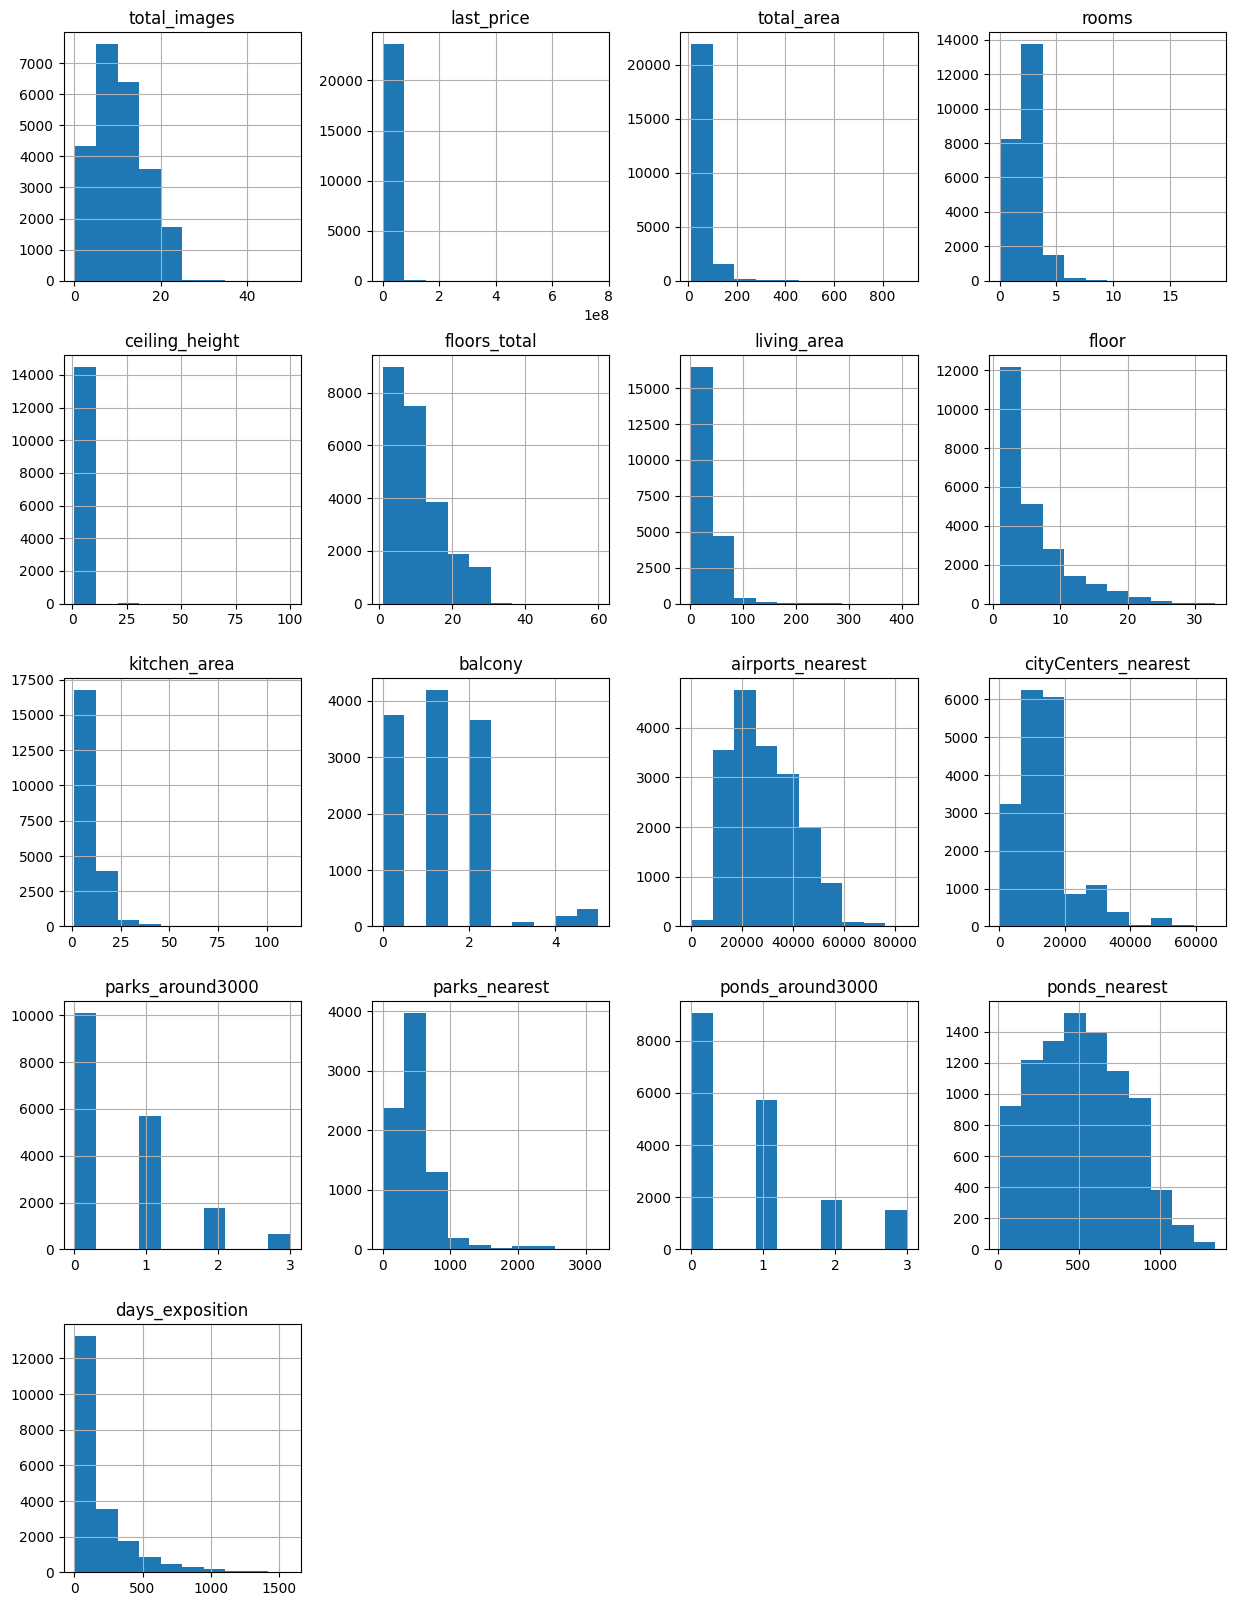

In [85]:
data.hist(figsize = (15,20));


Посмотрим на полноту предоставленных данных

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Переименуем столбец для приведения всех названий к snake_case

In [87]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

## Предобработка данных

### Преобразуем типы данных в столбцах

* first_day_exposition: из object в datetime
* is_apartment: из object в boolean
* floors_total: из float в integer

In [88]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'] = data['floors_total'].astype('int')
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

### Выведем информацию об отсутствии данных: столбцы, количество; столбцы, процент отсутствующих значений

In [89]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [90]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,0.000000


**Имеются отсутствующие данные в столбцах:**
- ceiling_height - отсутствующие значения заполним медианой
- living_area - восстановим недостающие значения
- kitchen_area - восстановим недостающие значения
- is_apartment - присвоим отсуствующим значениям "False"
- balcony - присвоим отсуствующим значениям "0", т.к параметр не будем применять в анализе
- locality_name - 49 строк с отсутствующими значениями можно удалить, т.к. местоположение - самая важная характеристика в оценке недвижимости
- airports_nearest - оставим отсутствующие значения, т.к. восстановить их не представляется возможным
- cityCenters_nearest - оставим отсутствующие значения, т.к. восстановить их не представляется возможным
- parks_around3000 - оставим отсутствующие значения
- parks_nearest - оставим отсутствующие значения
- ponds_around3000 - оставим отсутствующие значения
- ponds_nearest - оставим отсутствующие значения
- days_exposition - попробуем восстановить значения

Выведем таблицу с количественными характеристиками датасета

In [91]:
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,10.0,6.0,0.0,6.0,9.0,14.0,50.0
last_price,23699.0,6541549.0,10887013.0,12190.0,3400000.0,4650000.0,6800000.0,763000000.0
total_area,23699.0,60.0,36.0,12.0,40.0,52.0,70.0,900.0
rooms,23699.0,2.0,1.0,0.0,1.0,2.0,3.0,19.0
ceiling_height,14504.0,3.0,1.0,1.0,3.0,3.0,3.0,100.0
floors_total,23699.0,11.0,7.0,0.0,5.0,9.0,16.0,60.0
living_area,21796.0,34.0,22.0,2.0,19.0,30.0,42.0,410.0
floor,23699.0,6.0,5.0,1.0,2.0,4.0,8.0,33.0
kitchen_area,21421.0,11.0,6.0,1.0,7.0,9.0,12.0,112.0
balcony,12180.0,1.0,1.0,0.0,0.0,1.0,2.0,5.0


Просмотр статистики по количественным данным позволяет заметить некоторые интересные особенности:
- максимальная цена продажи объекта в сто раз превосходит медианное и среднее значение
- максимальное значение общей площади объекта 900м2 при средней 34м2 и медианной 30м2
- максимальное время размещения объявления 1580 дней при среднем 181 и медианном 95, скорее всего присутствуют выбросы
- минимальное кол-во комнат в объекте недвижимости 0 - скорее всего в студиях, максимальное 19, медианное 2


Проверим отсутствие полных дубликатов в строках

In [92]:
data[data.duplicated()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Удалим строки с NaN из столбца 'locality_name' - таких значений всего 49 шт., восстановить их не представляется возможным. Удаление не повлияет на качество анализа.

In [93]:
data = data.dropna(subset=['locality_name'])

#### Заменим отсутствующие данные в столбце is_apartment на 'False' - логично считать, что если параметр отсутствует, жилое помещение не является апартаментами

In [146]:
data['is_apartment'] = data['is_apartment'].fillna('False')

#### Посмотрим, какие значения высоты потолков ceiling_height присутствуют в данных

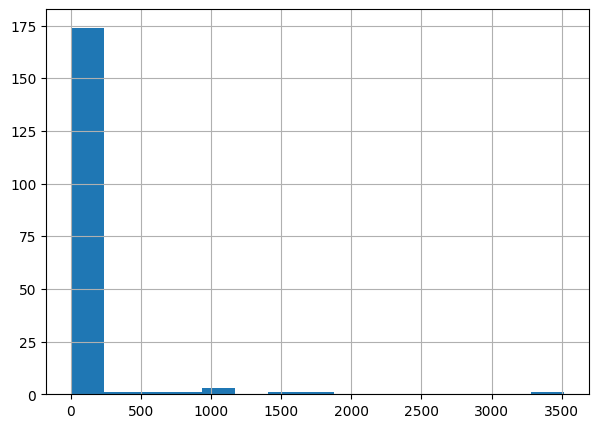

In [95]:
data.groupby('ceiling_height')['ceiling_height'].count().hist(bins = 15, figsize = (7, 5));

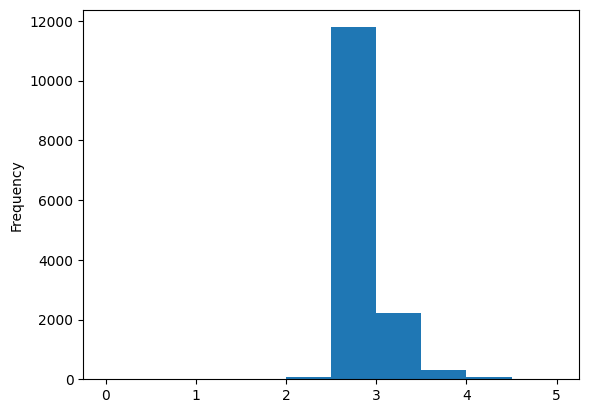

In [96]:
data['ceiling_height'].plot(kind='hist', bins =10, range = (0, 5 ));

Значения высоты потолков < 2, > 4,5 м. похожи на выбросы, скорее всего это ошибка написания, посмотрим сколько таких выбивающихся значений

In [97]:
len(data.query('ceiling_height < 2 or ceiling_height > 4.5'))

45

Некритичное количество некорректных значений 45 шт.  
Заполним недостающие значения, а также высоту потолков < 2, > 4,5 м. медианой

In [98]:
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)
data['ceiling_height'].mask(data['ceiling_height'] > 4.5, ceiling_height_median, inplace=True)
data['ceiling_height'].mask(data['ceiling_height'] < 2, ceiling_height_median, inplace=True)
len(data.query('ceiling_height < 2 or ceiling_height > 4.5'))

0

#### Определим уникальные значения населенных пунктов locality_name и удалим из них неявные дубликаты, поместим новые наименования в столбец locality_name_new

In [99]:
data['locality_name'] = data['locality_name'].replace('ё','е',regex=True)
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

In [100]:
locality_name_drop = ['деревня ', 'городской поселок ', 'поселок коттеджный ', 'поселок городского типа ',\
                      'поселок станции', 'поселок при железнодорожной станции ', 'село ',\
                      'садоводческое некоммерческое товарищество ', 'садовое товарищество ']
data['locality_name_new'] = data['locality_name'].replace(locality_name_drop,'',regex=True)
data['locality_name_new'] = data['locality_name_new'].replace(['поселок ', 'коттеджный '],'',regex=True)
data['locality_name_new'] = data['locality_name_new'].str.lstrip(' ')
print(len(data['locality_name_new'].unique()))
data['locality_name_new'].sort_values().unique()


305


array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

#### Проверим количество населенных пунктов, по которым отсутствуют и имеются заполнения недостающих значений airports_nearest, city_center_nearest

In [101]:
# значения удаленности от аэропорта отсутствуют
len(data.loc[data['airports_nearest'].isna() == True].groupby('locality_name_new'))

286

In [102]:
# значения удаленности от центра города отсутствуют
len(data.loc[data['city_centers_nearest'].isna() == True].groupby('locality_name_new'))

287

In [103]:
# значения присутствуют
len(data.loc[data['airports_nearest'].isna() == False].groupby('locality_name_new'))

27

In [104]:
# значения удаленности от центра города отсутствуют
len(data.loc[data['city_centers_nearest'].isna() == False].groupby('locality_name_new'))

27

Недостающие значения невозможно восстановить из имеющихся данных.  
Оставим NaN там, где они есть.  
Судя по всему, отсутствуют значения для небольших населенных пунктов, доля таких объявлений около 23%, при этом количество самих населенных пунктов с отсутствующими данными в колонках airports_nearest, city_centers_nearest  
в 10 раз превосходит кол-во населенных пунктов с наличествующими данными.  
В дальнейшем будем проводить анализ в части удаленности от аэропорта и от центра города на тех данных, которыми располагаем.

#### Пропуски в столбцах living_area, kitchen_area рассмотрим вместе с данными столбца total_area.  
Для начала проверим корректность тех данных, которые имеются, чтобы определить, нет ли в них таких значений, чтобы living_area и kitchen_area в сумме давали больше, чем total_area

In [105]:
data[['kitchen_area', 'living_area', 'total_area']].query('(kitchen_area + living_area) > total_area')

,kitchen_area,living_area,total_area
184,6.20,26.10,30.20
545,5.00,20.00,23.80
551,9.28,30.55,31.59
601,7.00,48.30,53.70
696,23.43,23.43,34.69
...,...,...,...
21824,8.60,38.00,44.00
21868,8.00,30.60,34.30
21915,32.40,62.00,91.40
21956,8.00,44.00,46.00


Заполним в этих 64 строках данные площади кухни: из total_area вычтем living_area и умножим на 0,9. Судя по всему, некоторые площади кухни станут очень маленькими, но таких данных будет некритично малый процент



In [106]:
data.loc[(data['living_area'] + data['kitchen_area']) > data['total_area'], 'kitchen_area' ] = (data['total_area'] - data['living_area'])*0.9
# проверим, что избавились от некорректных значений
data[['kitchen_area', 'living_area', 'total_area']].query('(kitchen_area + living_area) > total_area')

,kitchen_area,living_area,total_area


Теперь необходимо заполнить недостающие значения в столбцах living_area, kitchen_area в зависимости от total area.  
Для начала посмотрим, склолько отсутствующих значений kitchen_area в студиях

In [107]:
# данные отсутствуют для студий
len(data.query('living_area.isna()' and 'studio == True', engine='python'))

149

Заполним для студий площади кухни нулями, жилую площадь средней долей living_area от total_area для студий

In [108]:
data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True), 'kitchen_area'] = 0
data_living_studio = data[~(data['living_area'].isna()) & (data['studio'] == True)]
part_living_studio = (data_living_studio['living_area']/data_living_studio['total_area']).mean().round(2)
data.loc[(data['living_area'].isna()) & (data['studio'] == True), 'living_area'] = data['total_area'] * part_living_studio
len(data[(data['living_area'].isna()|data['kitchen_area'].isna()) & (data['studio'] == True)])

0

Теперь необходимо заполнить площади жилой, кухонной для оставшихся строк.  
Посчитаем среднюю долю жилой и кухонной площадей для не студий,  
вычислим жилую, кухонную площадь из общей total_area

In [109]:
data_area = data[(data['living_area'] > 0) & (data['kitchen_area'] > 0) & (data['studio'] == False)]
mean_part_living = (data_area['living_area']/data_area['total_area']).mean().round(2)
mean_part_kitchen = (data_area['kitchen_area']/data_area['total_area']).mean().round(2)
data['living_area'] = data['living_area'].fillna(data['total_area']*mean_part_living)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*mean_part_kitchen)
len(data.query('living_area.isna()' or 'kitchen_area.isna()', engine='python'))

0

#### Заполним пропуски в столбце floors_total.  
Примем допущение, что там, где не указана высотность здания, она равна этажу, на котором расположена квартира.  

In [110]:
data.loc[data['floors_total'] == 0, 'floors_total'] = data['floor']

Проверим, нет ли таких значений этажности здания floors_total, которые меньше этажа floor

In [111]:
print(len(data[data['floors_total'] < data['floor']]))
data['floors_total'].isna().sum()

0


0

#### Пропуски в столбце balcony.  
Отсутствующие данные в столбце balcony заполним нулями, т.к. эти данные не будут участвовать в анализе.  
Восстанавливать значения этого показателя для половины выборки не имеет смысла.  
Причин для появления пропусков может быть несколько:
- балкон действительно отсутствует
- автор объявления просто забыл заполнить поле

In [112]:
data['balcony'] = data['balcony'].fillna(0)

#### Пропуски в столбце days_exposition


Для начала оценим, сколько объектов недвижимости не имеют данных в столбце days_exposition, сгруппируем их по годам

In [113]:
# для удобства агрегации данных добавим столбец с годом размещения объявления
data['exposition_year'] = data['first_day_exposition'].dt.year
data[data['days_exposition'].isna()].pivot_table(index = 'exposition_year', values = 'locality_name', aggfunc = 'count')

,locality_name
exposition_year,
2014,18
2015,70
2016,67
2017,271
2018,958
2019,1796


In [114]:
data[data['days_exposition'].isna()].pivot_table(\
        index = 'locality_name', values = 'exposition_year', aggfunc = 'count').head(20)

,exposition_year
locality_name,
Бокситогорск,2
Волосово,5
Волхов,26
Всеволожск,59
Выборг,29
Гатчина,39
Зеленогорск,3
Ивангород,6
Каменногорск,3


Судя по тому, что больше всего объектов с отсутствующими значениями столбца days_exposition в 2019г. и данные отсутствуют для небольших населенных пунктов, можно предположить, что эти объекты недвижимости еще не проданы.  
Следовательно, для качественного анализа нецелесообразно их заполнять.  
Мы оставим отсутствующие значения в столбце days_exposition.

## Добавим в таблицу столбцы, которые в дальнейшем будем использовать для анализа

###  Добавим столбец со стоимостью 1 кв.м.

In [115]:
data['last_price_per_meter'] = (data['last_price']/data['total_area']).round()

### Добавим столбцы с временными параметрами публикации объявления:
- день недели
- месяц
- год

In [116]:
data['exposition_week_day'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
#data.head()

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет на будущие работы (в этом проекте этот метод не нужен): обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex.
    
Вот хорошая статья на этот счёт:
    
    https://runebook.dev/ru/docs/numpy/reference/arrays.datetime
    
    и
    
    https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]')
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

### Добавим столбец с типом этажа квартиры

In [117]:
def type_floor(row):
  floor = row['floor']
  floors_total = row['floors_total']
  if floor == 1:
    return 'первый'
  elif floor == floors_total:
    return 'последний'
  else:
    return 'другой'
data['type_floor'] = data.apply(type_floor, axis=1)

###  Добавим столбец с удаленностью от центра города в километрах

In [118]:
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round()

## Проведем исследовательский анализ данных

### Изучим период предоставления данных

In [148]:
print(data['first_day_exposition'].min(), data['first_day_exposition'].max())

2014-11-27 00:00:00 2019-05-03 00:00:00


### Изучим параметры объектов недвижимости с помощью гистограмм  
**Построим гистограммы для параметров:**
* общая площадь
* жилая площадь
* площадь кухни
* количество комнат

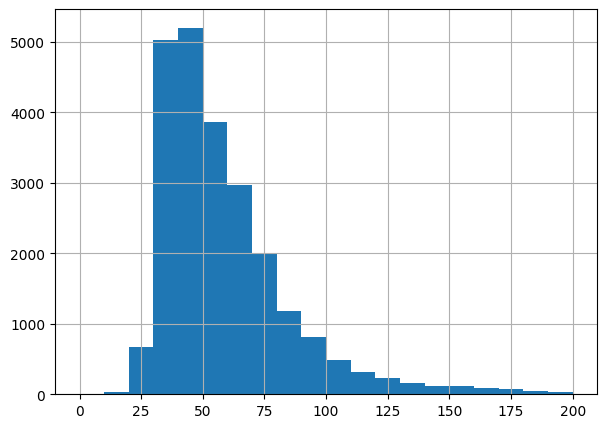

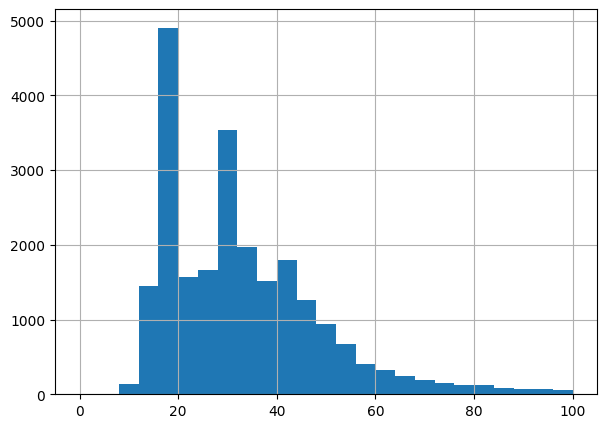

In [119]:
data['total_area'].hist(bins=20, figsize = (7,5), range = (0,200));
plt.show()
data['living_area'].hist(bins=25, figsize = (7,5), range = (0,100));

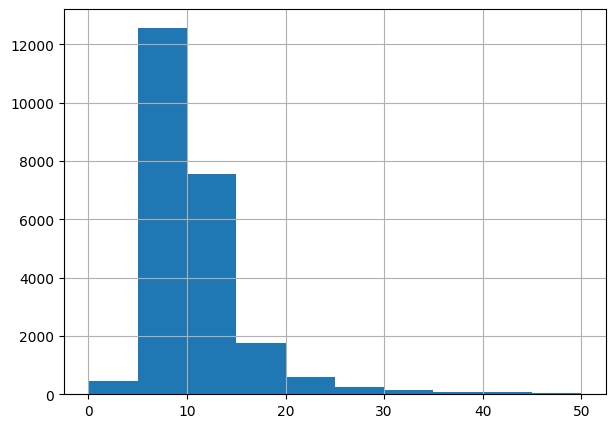

<Axes: >

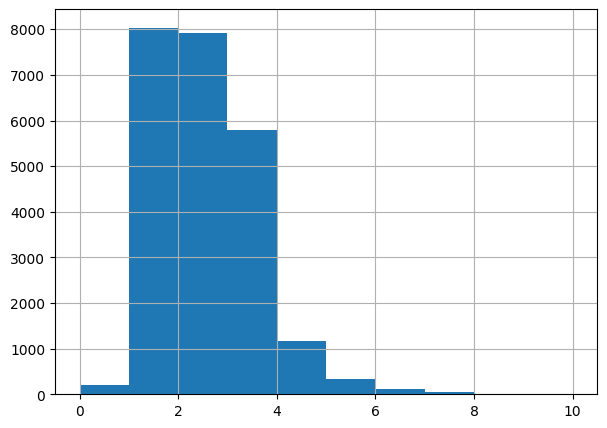

In [120]:
data['kitchen_area'].hist(bins=10, figsize = (7,5), range = (0,50))
plt.show();
data['rooms'].hist(bins=10, figsize = (7,5), range = (0,10))

**Вывод:**  
  
- пик значений показателя общей площади продаваемого жилья от 27 до 50 кв.м.
- пик значений показателя жилой площади продаваемого жилья 18-20 кв.м - около 1/4 объектов: сюда попадают и маленькие квартиры, и студии
- пик значений показателя кухонной площади продаваемого жилья от 5 до 15 кв.м. - около половины всех объектов
- большая часть продаваемых объектов недвижимости имеют кол-во комнат от 1 до 4-х

### Построим гистограммы для параметров:
* цена объекта
* высота потолков

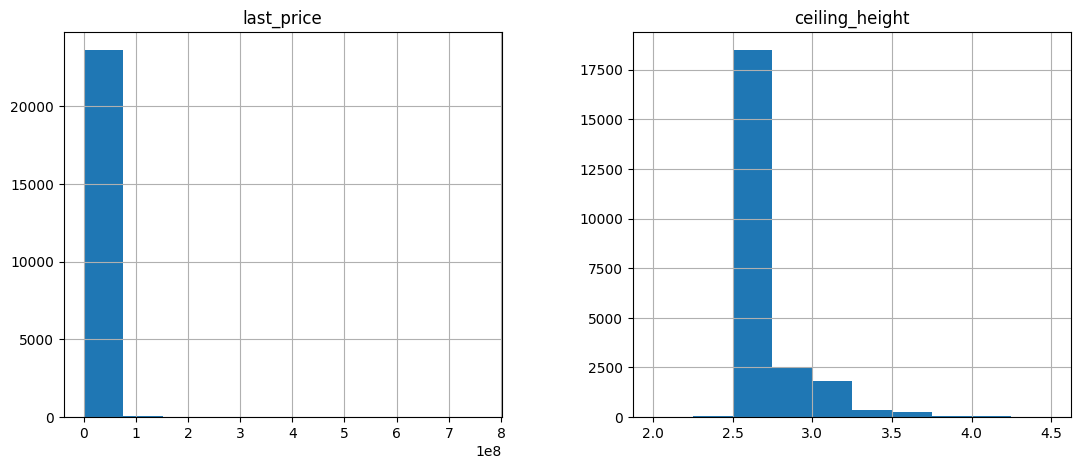

In [121]:
data[['last_price', 'ceiling_height']].hist(figsize = (13,5));

**Вывод:**  
  
- основная часть продаваемых объектов жилой недвижимости имеет стоимость до 8 млн.руб
- большинство объектов имеют потолки высотой от 2.5 до 2.75 м.

### Построим гистограммы для параметров:
* этаж квартиры
* тип этажа квартиры («первый», «последний», «другой»)
* общее количество этажей в доме

<Axes: xlabel='type_floor'>

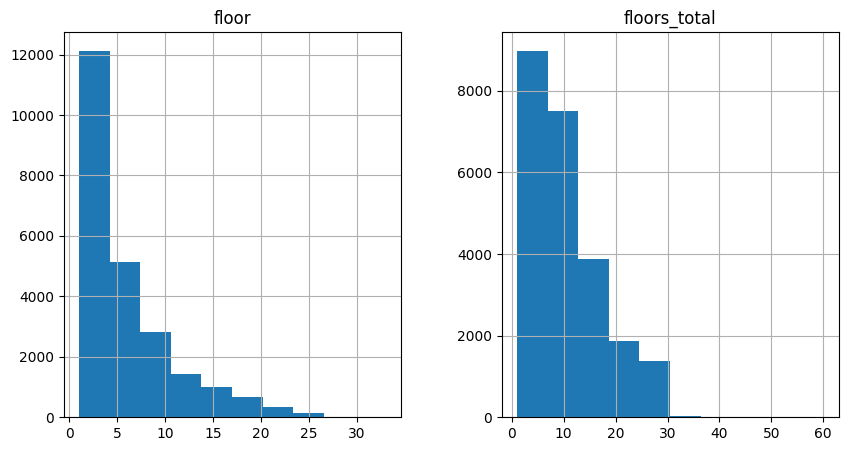

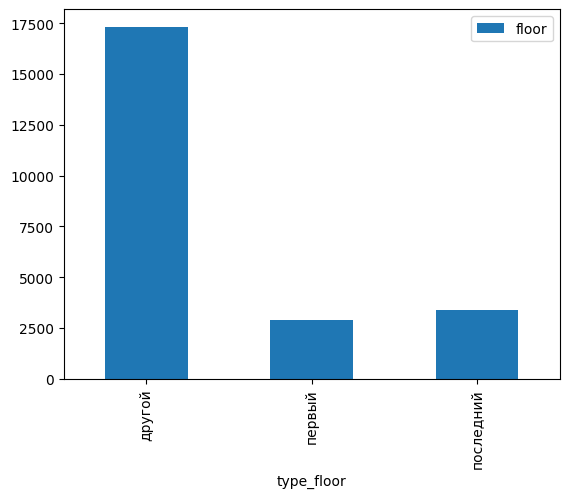

In [122]:
data[['floor', 'floors_total']].hist(bins = 10, figsize = (10,5));
data.pivot_table(index = 'type_floor', values = 'floor', aggfunc='count').plot(kind='bar')

**Вывод:**  
  
- около половины продаваемого жилья располагается на этажах с 1-го по 4-й, чуть меньшая часть с 5-го по 13-й, продаваемых объектов на этажах с 14 по 27 совсем небольшая доля
- большинство объектов продаваемой недвижимости располагается в зданиях высотой от 1 до 18 этажей, объектов в зданиях выше 30 этажей совсем малое кол-во
- около 3/4 всей продаваемой недвижимости располагается не на первом и не на последнем этажах

### Построим гистограммы для параметров:
* расстояние до центра города в метрах
* расстояние до ближайшего аэропорта
* расстояние до ближайшего парка

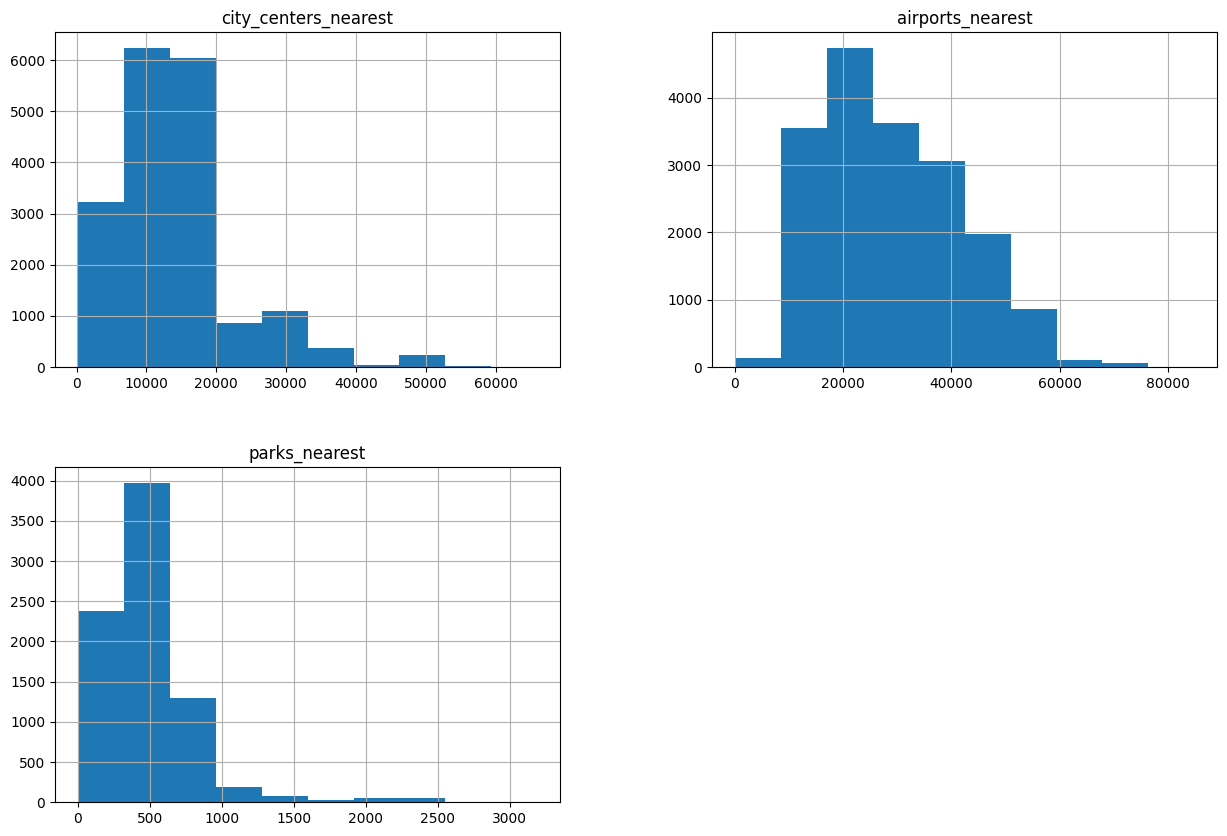

In [123]:
data[['city_centers_nearest', 'airports_nearest', 'parks_nearest']].hist(figsize = (15,10));

**Вывод:**  
  
- у объектов, для которых указан параметр расстояния до центра города, большая часть располагается на расстоянии от 6 до 20 км.
- на расстоянии от аэропорта 18 - 25 км
- больше всего парков на расстоянии до 1 км, т.е. в пешей доступности

### Построим столбчатые диаграммы для параметров:
* день публикации объявления
* месяц публикации объявления

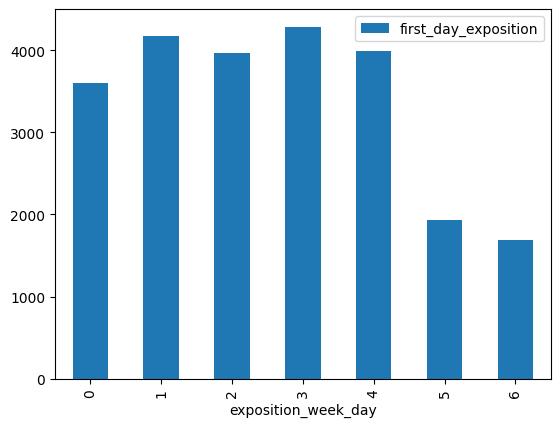

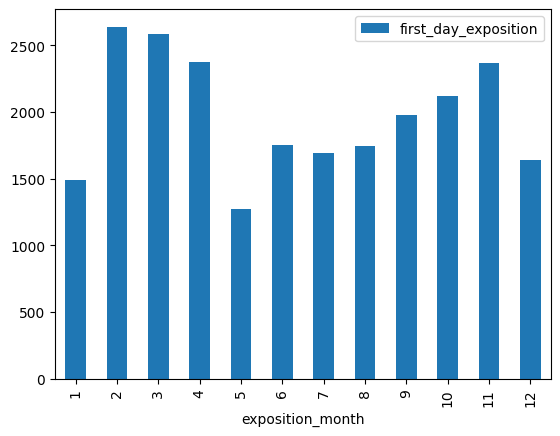

In [124]:
data.pivot_table(index = 'exposition_week_day', values = 'first_day_exposition', aggfunc='count').plot(kind='bar')
data.pivot_table(index = 'exposition_month', values = 'first_day_exposition', aggfunc='count').plot(kind='bar');

**Вывод:**  
  
- меньше всего объявлений размещается в субботу и воскресенье
- по месяцам:
> * в январе довольно маленькое кол-во публикуемых объявлений
> * с февраля по апрель увеличение предложения
> * май - месяц с самым маленьким количеством публикуемых объявлений
> * с июня по ноябрь наблюдается рост
> * в декабре снижение предложений

## Оценим данные в столбце days_exposition.  
Для этого построим диаграммы ящик с усами и гистограмму:

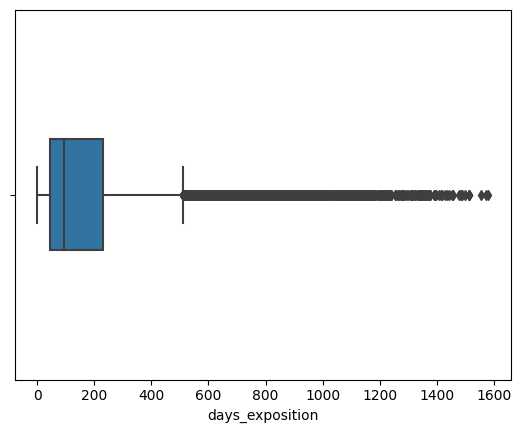

In [140]:
sns.boxplot(x = data['days_exposition'], width=.3);

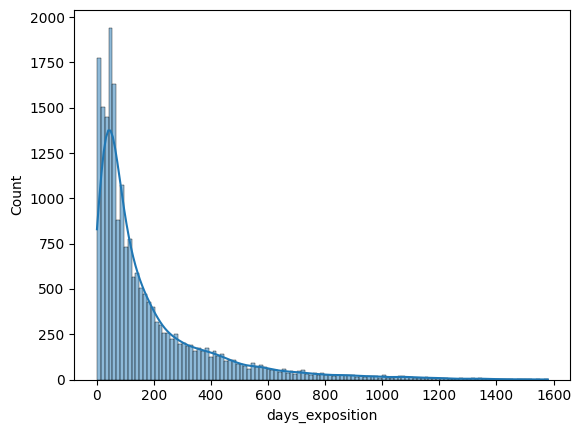

In [142]:
sns.histplot(data['days_exposition'], kde=True);

Посмотрим на распределение показателя в объявлениях

In [152]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [45]:
# доля выбросов
(data.query('days_exposition > 510')['days_exposition'].count()/len(data.query('days_exposition > 0'))).round(2)

0.08

In [46]:
data.query('days_exposition > 510')['locality_name_new'].value_counts()

Санкт-Петербург    1167
Кудрово              34
Мурино               33
Всеволожск           31
Пушкин               29
                   ... 
Назия                 1
Светогорск            1
Репино                1
Калитино              1
Рабитицы              1
Name: locality_name_new, Length: 112, dtype: int64

**Вывод**  

Наиболее быстрыми можно считать продажи, которые укладываются в первый квартиль (25% выборки), т.е. время размещения объявлений по которым составило от 1 до 45 дней.  
   
Необычно долгие продажи - те, которые выходят за границы усов boxplot и похожи на выбросы - длительность размещения объявлений по ним превышает 510 дней, они составляют 8% от исследуемого объема данных и встречаются примерно в 1/3 всех исследуемых неселенных пунктов, включая Санкт-Петербург.




## Оценим то, какие факторы больше всего влияют на общую (полную) стоимость объекта.
Рассмотрим корреляцию цены last_price с различными характеристиками объекта:
- total_area — общая площадь квартиры в квадратных метрах (м²)
- living_area — жилая площадь в квадратных метрах (м²)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- rooms — число комнат
- этажа, на котором расположена квартира (первый, последний, другой)
- даты размещения



### Построим матрицу корреляций для количественных характеристик недвижимости и выведем для нее тепловую карту

<Axes: >

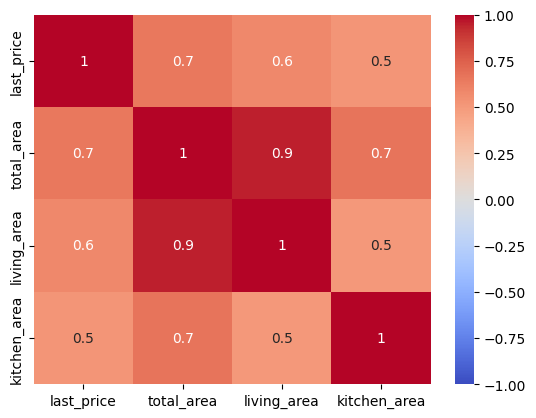

In [143]:
data_price_with_characteristics = data[['last_price', 'total_area', 'living_area', 'kitchen_area']]
sns.heatmap(data_price_with_characteristics.corr(), vmin = -1, vmax = 1, fmt='.1g',  annot = True, center= 0, cmap= 'coolwarm' )

**Вывод**  

Судя по тепловой  карте, мы делаем следующие выводы:
- наибольшая зависимость медианной стоимости жилья наблюдается для общей площади - 0,7: средняя степень выраженности
- чуть меньше стоимость объекта нидвижимости зависит от жилой площади - 0,6: степень выраженности слабее
- ещё меньше от площади кухни - 0,5: слабая степень выраженности зависимости

**Построим точечные графики зависимости цены объекта от площадей**

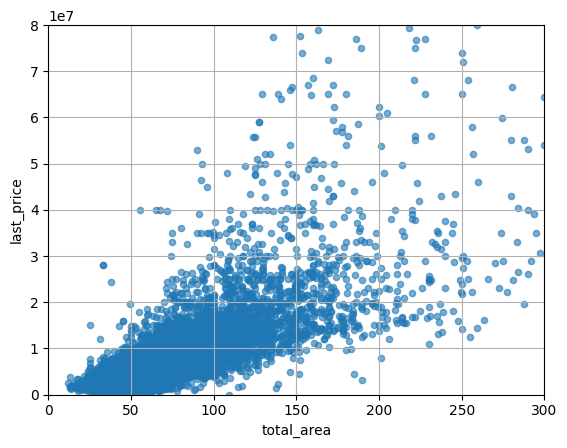

In [48]:
#общая площадь и цена объекта
data.plot(kind = 'scatter', x = 'total_area', y = 'last_price', xlim = (0, 300), ylim = (0, 80000000),\
          alpha = 0.6,  grid=True);

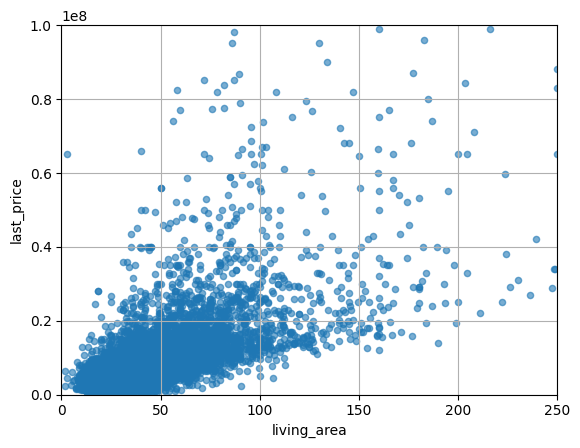

In [49]:
#жилая площадь и цена объекта
data.plot(kind = 'scatter', x = 'living_area', y = 'last_price', xlim = (0, 250), ylim = (0, 100000000),\
          alpha = 0.6,  grid=True);

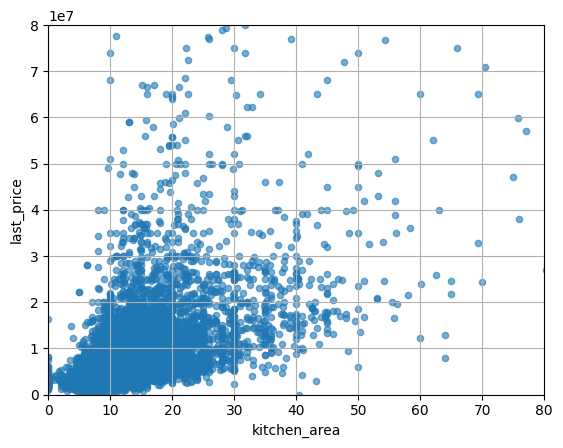

In [50]:
#кухонная площадь и цена объекта
data.plot(kind = 'scatter', x = 'kitchen_area', y = 'last_price', xlim = (0, 80), ylim = (0, 80000000),\
          alpha = 0.6,  grid=True);

**Вывод:**  

Точечные графики показали, что зависимость между ценой объекта и разными типами площадей (общей,  
жилой и кухонной) имеет похожую плотность распределения:  
при стоимости объектов до 20 млн.руб.наблюдается существенная прямая зависимость, выше этой стоимости зависимость  
становится меньше с ростом цены.

<BarContainer object of 17 artists>

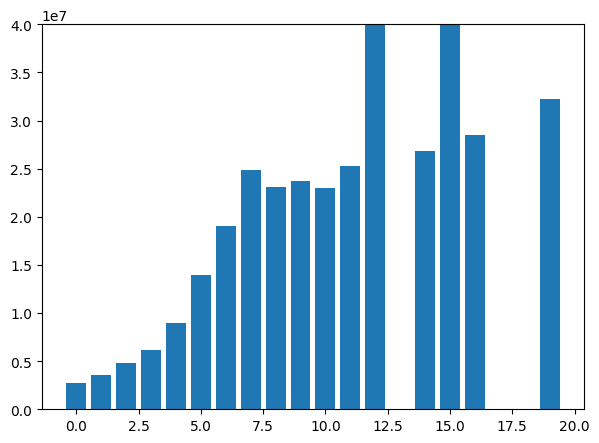

In [51]:
df_rooms = data.groupby('rooms')['last_price'].median().round()
plt.figure(figsize=(7, 5))
plt.ylim([0, 40000000])
plt.bar(df_rooms.index, df_rooms)

In [52]:
data.groupby('rooms')['last_price'].count()

rooms
0      197
1     8036
2     7924
3     5797
4     1175
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: last_price, dtype: int64

**Вывод:**  

При количестве комнат продаваемых объектов до 7 наблюдается прямая зависимость между ценой объекта и количеством комнат,  
при количестве комнат от 8 и выше зависимость не прослеживается.
Судя по тому, что почти вся рассматриваемая выборка - это объекты с количеством комнат до 7 шт., можно сделать вывод,
что коэффициент корреляции этих двух параметров стремится к 1.

### Оценим зависимости между временем размещения объявления и ценой продаваемого объекта

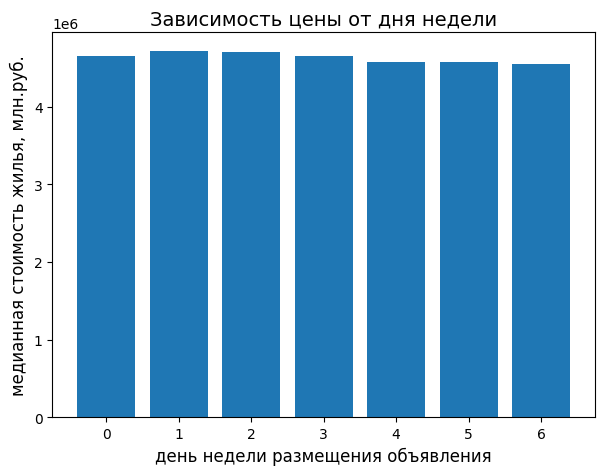

In [144]:
data_1 = data.groupby('exposition_week_day')['last_price'].median().round()
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(7, 5))
plt.xlabel("день недели размещения объявления", fontsize=12)
plt.ylabel("медианная стоимость жилья, млн.руб.", fontsize=12)
plt.title("Зависимость цены от дня недели", fontsize=14)
plt.bar(data_1.index, data_1);

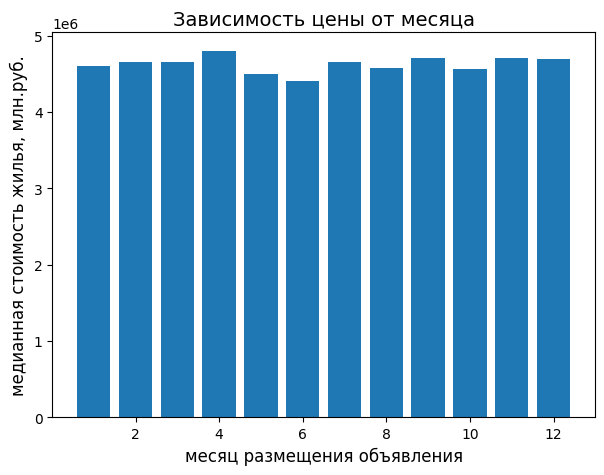

In [145]:
data_2 = data.groupby('exposition_month')['last_price'].median()
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(7, 5))
plt.xlabel("месяц размещения объявления", fontsize=12)
plt.ylabel("медианная стоимость жилья, млн.руб.", fontsize=12)
plt.title("Зависимость цены от месяца", fontsize=14)
plt.bar(data_2.index, data_2);

<BarContainer object of 6 artists>

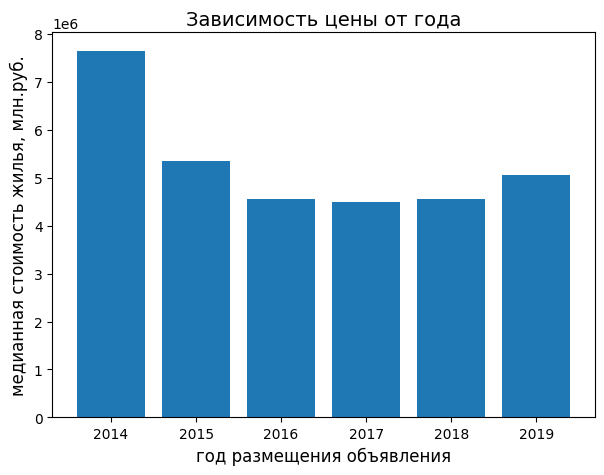

In [55]:
data_2 = data.groupby('exposition_year')['last_price'].median()
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(7, 5))
plt.xlabel("год размещения объявления", fontsize=12)
plt.ylabel("медианная стоимость жилья, млн.руб.", fontsize=12)
plt.title("Зависимость цены от года", fontsize=14)
plt.bar(data_2.index, data_2)

Судя по графикам, существенная зависимость между ценой объекта и временем размещения объявления наблюдается только по годам:
Возможно, площади продаваемых объектов также менялись от года к году
Проверим это построением графика

<BarContainer object of 6 artists>

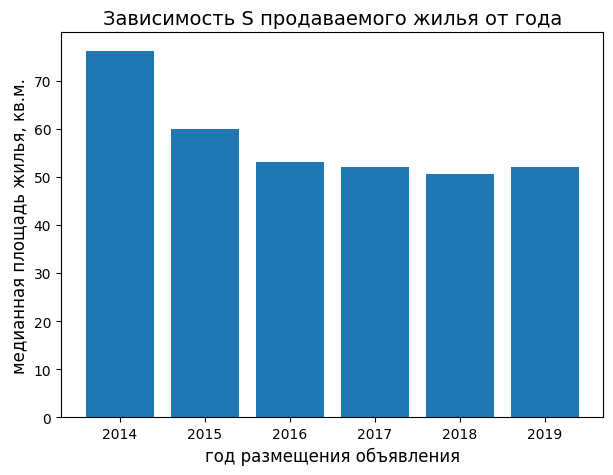

In [56]:
data_2 = data.groupby('exposition_year')['total_area'].median()
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(7, 5))
plt.xlabel("год размещения объявления", fontsize=12)
plt.ylabel("медианная площадь жилья, кв.м.", fontsize=12)
plt.title("Зависимость S продаваемого жилья от года", fontsize=14)
plt.bar(data_2.index, data_2)

**Вывод**  
  
Анализ графиков показал, что влияние времени размещения объявления (месяц, год) ничтожно мало.  
Конечная стоимость объекта в значительной степени зависит от его площади.

### Оценим зависимость между ценой продаваемого жилья и типом этажа, на котором располагается объект недвижимости

,last_price
type_floor,
другой,4848500.0
первый,3900000.0
последний,4350000.0


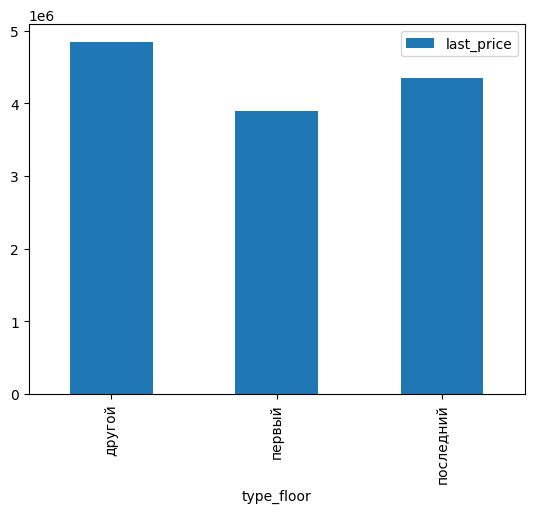

In [57]:
data.pivot_table(index = 'type_floor', values = 'last_price', aggfunc='median').plot(kind='bar')
data.pivot_table(index = 'type_floor', values = 'last_price', aggfunc='median')

**Вывод:**  
Мы видим, что самая низкая цена на объекты жилой недвижимости, раположенные на первом этаже; при этом выше остальных цена на жильё, расположенное не на первом и не на последнем этаже.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Как в песне, "первый и последний этаж не предлагать". Традиционно, квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.
</div>

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [58]:
data_avg_price_per_m2 = data.pivot_table(index = 'locality_name_new',\
    values = 'last_price_per_meter', aggfunc=['count', 'mean']).\
    sort_values(by =('count','last_price_per_meter'), ascending=False)[:10].round()
data_avg_price_per_m2.columns = ['count_exposition', 'avg_price_per_m2']
data_avg_price_per_m2

,count_exposition,avg_price_per_m2
locality_name_new,,
Санкт-Петербург,15721,114849.0
Мурино,590,86088.0
Кудрово,472,95325.0
Шушары,440,78677.0
Всеволожск,398,68654.0
Пушкин,369,103126.0
Колпино,338,75425.0
Парголово,327,90176.0
Гатчина,307,68746.0


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Таблица верна. Совет: на общие продажи лучше смотреть через призму медианы. Она более устойчива к выбросам
</div>

<div class="alert alert-info"> <b>Комментарий студента: </b> Спасибо, учту в следующем проекте. Сделала среднее, т.к. в задании вычислить среднее</div>

In [59]:
data_avg_price_per_m2[data_avg_price_per_m2['avg_price_per_m2'] == data_avg_price_per_m2['avg_price_per_m2'].max()]

,count_exposition,avg_price_per_m2
locality_name_new,,
Санкт-Петербург,15721,114849.0


In [60]:
data_avg_price_per_m2[data_avg_price_per_m2['avg_price_per_m2'] == data_avg_price_per_m2['avg_price_per_m2'].min()]

,count_exposition,avg_price_per_m2
locality_name_new,,
Выборг,237,58142.0


**Вывод:**  
<p> </p>
   
В результате анализа 10 населенных пунктов с наибольшим количеством объявлений получили следующие данные:  
* населенный пункт с самой высокой средней стоимостью 1 кв.м. продаваемого жилья: Санкт-Петербург	- 114849 за м2  
* населенный пункт с самой низкой средней стоимостью 1 кв.м. продаваемого жилья: Выборг	- 58142 за м2


### Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра.

In [61]:
df = data.query('locality_name_new == "Санкт-Петербург"').groupby(\
      'city_centers_nearest_km')['last_price_per_meter'].mean().round()

<BarContainer object of 30 artists>

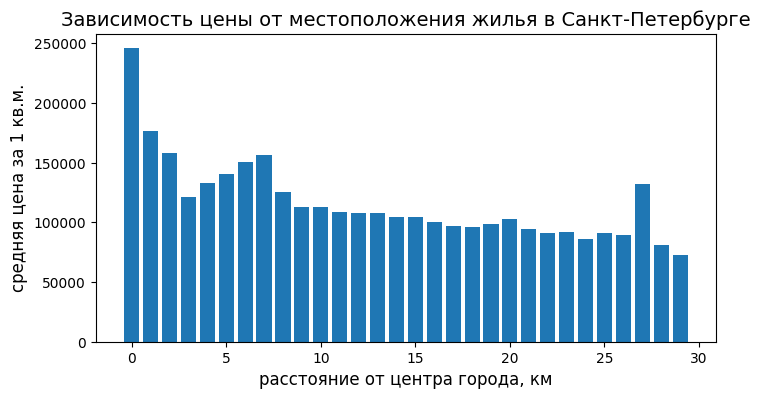

In [62]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(8, 4))
plt.xlabel("расстояние от центра города, км", fontsize=12)
plt.ylabel("средняя цена за 1 кв.м.", fontsize=12)
plt.title("Зависимость цены от местоположения жилья в Санкт-Петербурге", fontsize=14)
plt.bar(df.index, df)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный и наглядный график 👍
    
Здорово, когда он подписан. Так быстрее понять о чем идёт речь на нём.
    
</div>

In [63]:
data.query('locality_name_new == "Санкт-Петербург"' and 'city_centers_nearest_km == 27').groupby('exposition_year')['exposition_year'].count()

exposition_year
2014     2
2015     3
2016    13
2017    41
2018    35
2019    10
Name: exposition_year, dtype: int64

**Вывод**  
<p> </p>
  
На графике видно:  
* на расстоянии от 0 до 3 км есть зависимость - чем ближе к центру, тем выше цена за 1 кв.м. жилья;  
* с 3 до 7 км средняя стоимость напротив увеличивается, возможно на этом расстоянии находятся районы, где стоимость жилья обусловлена не только удаленностью от центра;  
* с 8 километра наблюдается тенденция к снижению стоимости;  
* на 27 км. мы наблюдаем скачок цены, при этом кол-во реализуемых объектов на этом расстоянии составляет 104 шт. и распределено по всем годам - не похоже на выброс - возможно, на этом расстоянии расположен дорогостоящий жилой район.

## **Результат проведенного исследования данных**
Мы провели исследование данных сервиса Яндекс Недвижимость — архив объявлений с 2014 по 2019 гг. о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

**Процесс работы с данными**

*Проанализиовали выборку из 23699 строк (в процессе обработки была уменьшена до 23650 строк), которая содержит следующие столбцы:*
- locality_name — название населённого пункта
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

*Заполнили осутствующие значения в следующих столбцах:*
* is_apartment
* ceiling_height
* living_area
* kitchen_area
* floors_total
* balcony

*В процессе работы с данными для удобства анализа были добавлены следующие столбцы:*
* locality_name_new - столбец, где отсутствуют неявные дубликаты названий наеленных пунктов
* last_price_per_meter - цена одного квадратного метра
* exposition_week_day - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
* exposition_month - месяц публикации объявления
* exposition_year - год публикации объявления
* type_floor - тип этажа квартиры (значения — «‎первый», «последний», «другой»)
* city_centers_nearest_km - расстояние до центра города в километрах

## Выводы

1. **Скорость продажи квартиры**  
* Наиболее быстрыми можно считать продажи, время размещения объявлений по которым составило от 1 до 45 дней.  
* Необычно долгие продажи c длительностью размещения объявлений больше 510 дней, они составляют 8% от исследуемого объема данных



2. **Зависимость стоимости жилья от площади, количества комнат объекта**  
* Общая площадь объекта недвижимости существенно взимосвязана с его итоговой стоимостью: корреляция медианной стоимости жилья с общей площадью составляет 0,7 - средняя степень выраженности.    
* Зависимость между ценой объекта и разными типами площадей (общей, жилой и кухонной) имеет похожую плотность распределения:  
    * при стоимости объектов до 20 млн.руб.наблюдается существенная прямая зависимость,  
    * выше этой стоимости зависимость становится меньше с ростом цены.  
* Существует прямая зависимость между ценой на объект и количеством его комнат.
3. **Зависимость стоимости жилья от года размещения объявления**  
Стоимость жилья не зависит от месяца и года размещения объявления, изменение медианной стоимости  
по годам обусловлено изменением медианной площади продаваемых объектов.
4. **Зависимость стоимости жилья от этажа его расположения**
- самая низкая цена на объекты жилой недвижимости, расположенные на первом этаже;  
- выше остальных цена на жильё, расположенное не на первом и не на последнем этаже
5. **Зависимость стоимости жилья от места его расположения**

В результате анализа 10 населенных пунктов с наибольшим количеством объявлений получили следующие данные:  
* населенный пункт с самой высокой средней стоимостью 1 кв.м. продаваемого жилья: Санкт-Петербург	- 114849 за м2 (15721 объявлений)
* населенный пункт с самой низкой средней стоимостью 1 кв.м. продаваемого жилья: Выборг	- 58142 за м2 (237 объявлений)
